## 🔬 Project Title: Arrhythmia Classification Using Machine Learning

### 🎯 Objectives

To develop and evaluate a comprehensive ECG analysis framework that:

- ✅ **Implements and compares** an ensemble of optimized machine learning models (e.g., **XGBoost, Random Forest, SVC**) using **probability density function (PDF)**‑based methodologies.
- ✅ **Bridges the gap** in existing literature by incorporating and assessing **simpler classification algorithms** (e.g., **K‑Nearest Neighbours, Logistic Regression**) alongside complex ensembles.
- ✅ **Designs and trains a convolutional neural network (CNN)** for **image‑based ECG pattern recognition**, enabling **automated detection** of arrhythmias from ECG signal plots.


### 👥 Group Members

| Name               | Roll No. |
|--------------------|----------|
| Sheiladitya Basu   | A006     |
| Tanvi Chavan       | A007     |
| Vaibhav Chavan     | A008     |
| Ronald Chettiar    | A009     |
| Janisa Dabre       | A010     |


### MIT-BIH Arrhythmia Database Overview

The **MIT-BIH Arrhythmia Database** is a widely used benchmark dataset for the study of cardiac arrhythmias and the evaluation of automated ECG analysis algorithms. The dataset was created by the **Massachusetts Institute of Technology (MIT)** and **Beth Israel Hospital** (now Beth Israel Deaconess Medical Center), and has been publicly available since 1980 through **PhysioNet**.

It serves as a standard testbed for:

- Arrhythmia detection  
- Signal processing  
- ECG classification tasks  

---

#### Dataset Characteristics

The database consists of **48 half-hour excerpts** of two-channel ambulatory ECG recordings collected between **1975 and 1979**. These recordings were obtained from **47 subjects**, with one subject contributing two recordings. The dataset includes a variety of ECG signals representing both normal and abnormal heart rhythms.

Of the 48 recordings:
- **23 recordings** were randomly selected from a set of 4,000 long-term (24-hour) ECGs from inpatients (~60%) and outpatients (~40%) at Beth Israel Hospital.
- **25 recordings** were chosen specifically to include **less common but clinically significant arrhythmias** that wouldn't appear frequently in a random sample.

---

#### Annotation Details

Each heartbeat has been **manually annotated by at least two independent cardiologists**, ensuring high-quality reference labels. Any discrepancies were resolved via review.  

- **Total annotated heartbeats**: ~110,000  
- **Each beat is labeled** with a class indicating the type of beat or abnormality.

---

#### Label Description

- **Number of Samples**: 109,446  
- **Number of Categories**: 5  
- **Sampling Frequency**: 125 Hz  

**Classes**:
- `'N': 0` → Normal beat  
- `'S': 1` → Supraventricular premature beat  
- `'V': 2` → Premature ventricular contraction  
- `'F': 3` → Fusion of ventricular and normal beat  
- `'Q': 4` → Unclassifiable beat  


## 🛠️ Methodology

### 📊 Ensemble and Simple Models

- 🔹 **Data Loading**
- 🔹 **Data Exploration**
- 🔹 **Data Cleaning**
- 🔹 **Data Preparation & Splitting**
- 🔹 **Feature Engineering (PCA)**
- 🔹 **Supervised Model Training**  
  &nbsp;&nbsp;&nbsp;&nbsp;• Ensemble Models: XGBoost, Random Forest, SVC  
  &nbsp;&nbsp;&nbsp;&nbsp;• Simple Models: Logistic Regression, K-Nearest Neighbours
- 🔹 **Model Evaluation**
- 🔹 **Detailed Analysis of Best Models**

---

### 🧠 CNN Approach

- 🔹 **Load Train and Test Datasets**
- 🔹 **Split into Features (X) and Labels (y)**
- 🔹 **Downsample Each Class**  
  &nbsp;&nbsp;&nbsp;&nbsp;• 400 samples per class for training  
  &nbsp;&nbsp;&nbsp;&nbsp;• 150 samples per class for testing
- 🔹 **Convert 1D Signals to 100×100 px PNG Images**
- 🔹 **Build DataFrames** of Image Filenames & Labels
- 🔹 **Create ImageDataGenerators** for Train/Test Sets
- 🔹 **Define & Compile 2D CNN Architecture**
- 🔹 **Train Model** with `EarlyStopping` & `ModelCheckpoint`
- 🔹 **Plot Training Loss & Accuracy**
- 🔹 **Evaluate Model** on Test Set  
  &nbsp;&nbsp;&nbsp;&nbsp;• Accuracy  
  &nbsp;&nbsp;&nbsp;&nbsp;• Classification Report  
  &nbsp;&nbsp;&nbsp;&nbsp;• Confusion Matrix


## **CODE:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/rt/mitbih_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/rt/mitbih_test.csv')

In [3]:
# 1. Data Shape
print("Data Shape:", train_df.shape)

# 2. Summary Statistics
print("\nSummary Statistics:")
display(train_df.describe())

# 3. Missing Values
print("\nMissing Values:")
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_info)

# 4. Duplicate Rows
duplicate_rows = train_df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)

# 5. Target Variable Distribution
target_variable = train_df.iloc[:, -1]
target_counts = target_variable.value_counts()
print("\nTarget Variable Distribution:")
display(target_counts)

# 6. Class Balance
class_percentages = (target_counts / len(train_df)) * 100
print("\nClass Balance:")
display(class_percentages)

# 7. Feature Distributions
# Due to the large number of features, histograms for each feature will not be generated
# in this code block. It is recommended to analyze the distributions using other tools
# or selectively plot histograms for specific features of interest.

Data Shape: (87553, 188)

Summary Statistics:


,0.98,0.93,0.68,0.25,0.15,0.19,0.15.1,0.09,0.06,0.05,...,0.00.79,0.00.80,0.00.81,0.00.82,0.00.83,0.00.84,0.00.85,0.00.86,0.00.87,0.00.88
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890383,0.758161,0.423985,0.219095,0.201116,0.210383,0.205812,0.201765,0.198692,0.196746,...,0.005028,0.004627,0.004291,0.003944,0.003680,0.003472,0.003220,0.002945,0.002807,0.473382
std,0.240934,0.221849,0.227323,0.206892,0.177080,0.171935,0.178493,0.177269,0.171808,0.168375,...,0.044179,0.042088,0.040524,0.038647,0.037186,0.036259,0.034787,0.032869,0.031921,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,0.680000,0.250000,0.050000,0.080000,0.090000,0.070000,0.070000,0.060000,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990000,0.830000,0.430000,0.170000,0.150000,0.160000,0.150000,0.140000,0.150000,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910000,0.580000,0.340000,0.260000,0.290000,0.300000,0.300000,0.290000,0.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000



Missing Values:


,Missing Values,Percentage
0.98,0,0.0
0.93,0,0.0
0.68,0,0.0
0.25,0,0.0
0.15,0,0.0
...,...,...
0.00.84,0,0.0
0.00.85,0,0.0
0.00.86,0,0.0
0.00.87,0,0.0



Duplicate Rows: 0

Target Variable Distribution:


,count
0.00.88,
0.0,72470
4.0,6431
2.0,5788
1.0,2223
3.0,641



Class Balance:


,count
0.00.88,
0.0,82.772721
4.0,7.345265
2.0,6.610853
1.0,2.539033
3.0,0.732128


In [4]:
target_variable

,0.00.88
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
87548,4.0
87549,4.0
87550,4.0
87551,4.0


In [5]:
# Check for missing values and replace with mean
for df in [train_df, test_df]:
  for column in df.columns:
    if df[column].isnull().any():
      df[column].fillna(df[column].mean(), inplace=True)

# Check for duplicate rows and remove them
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [6]:
# Extract features and target for training data
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

# Extract features and target for testing data
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [8]:
from sklearn.decomposition import PCA

# Instantiate PCA with n_components=30
pca = PCA(n_components=30)

# Fit PCA on the training data
pca.fit(X_train_new)

# Transform both training and validation data using the fitted PCA model
df_pca_train = pd.DataFrame(pca.transform(X_train_new))
df_pca_val = pd.DataFrame(pca.transform(X_val))

In [9]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

# Initialize models with default hyperparameters
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
linear_svc_model = LinearSVC()

# Train models using the training data
xgb_model.fit(X_train_new, y_train_new)
lgbm_model.fit(X_train_new, y_train_new)
rf_model.fit(X_train_new, y_train_new)
svc_model.fit(X_train_new, y_train_new)
linear_svc_model.fit(X_train_new, y_train_new)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18360
[LightGBM] [Info] Number of data points in the train set: 70042, number of used features: 187
[LightGBM] [Info] Start training from score -0.190499
[LightGBM] [Info] Start training from score -3.658534
[LightGBM] [Info] Start training from score -2.708364
[LightGBM] [Info] Start training from score -4.964488
[LightGBM] [Info] Start training from score -2.602940


LinearSVC()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the models on the validation set
models = [xgb_model, lgbm_model, rf_model, svc_model, linear_svc_model]
model_names = ['XGBoost', 'LightGBM', 'Random Forest', 'SVC', 'Linear SVC']
results = {}

for model, name in zip(models, model_names):
    y_pred_val = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average='macro')
    recall = recall_score(y_val, y_pred_val, average='macro')
    f1 = f1_score(y_val, y_pred_val, average='macro')
    conf_matrix = confusion_matrix(y_val, y_pred_val)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Confusion Matrix': conf_matrix,
    }

# Print and analyze the results for each model
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print("-" * 30)

# Select the best-performing model based on the results
# (Consider both overall performance and performance on minority classes)
# Implement logic to determine the best model based on the evaluation metrics
# You can choose the model with the highest F1-score or accuracy, or consider other factors
# such as the confusion matrix and the performance on minority classes.
# Example:
best_model_name = max(results, key=lambda k: results[k]['F1-score'])
print(f"The best-performing model is: {best_model_name}")

Model: XGBoost
Accuracy: 0.9813
Precision: 0.9599
Recall: 0.8548
F1-score: 0.8996
Confusion Matrix:
 [[14532    14    24     4     3]
 [  128   285     4     0     1]
 [   69     0  1043     6     2]
 [   35     0    13   104     0]
 [   18     0     7     0  1219]]
------------------------------
Model: LightGBM
Accuracy: 0.9801
Precision: 0.9455
Recall: 0.8440
F1-score: 0.8872
Confusion Matrix:
 [[14528    14    23     9     3]
 [  130   282     6     0     0]
 [   73     0  1036     9     2]
 [   38     0    16    98     0]
 [   18     0     8     0  1218]]
------------------------------
Model: Random Forest
Accuracy: 0.9757
Precision: 0.9680
Recall: 0.8164
F1-score: 0.8779
Confusion Matrix:
 [[14552     9    13     2     1]
 [  158   255     4     0     1]
 [  123     0   990     5     2]
 [   47     0     9    96     0]
 [   48     0     4     0  1192]]
------------------------------
Model: SVC
Accuracy: 0.9670
Precision: 0.9436
Recall: 0.7565
F1-score: 0.8266
Confusion Matrix:
 [[

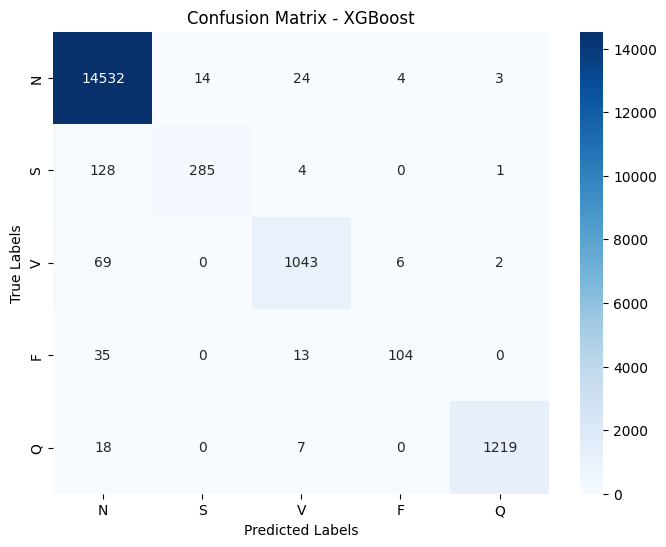

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# XGBoost Confusion Matrix
conf_matrix = np.array([
    [14532, 14, 24, 4, 3],
    [128, 285, 4, 0, 1],
    [69, 0, 1043, 6, 2],
    [35, 0, 13, 104, 0],
    [18, 0, 7, 0, 1219]
])

# Class labels
labels = ['N', 'S', 'V', 'F', 'Q']  # or replace with your actual class names

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Get predictions for XGBoost
xgb_y_pred_val = results['XGBoost']['Confusion Matrix'].argmax(axis=1)  # <-- Optional if you only have CM
xgb_y_pred = xgb_model.predict(X_val)

# Print the classification report
print("Class-wise Evaluation Metrics for XGBoost:\n")
print(classification_report(y_val, xgb_y_pred, digits=4))


Class-wise Evaluation Metrics for XGBoost:

              precision    recall  f1-score   support

         0.0     0.9831    0.9969    0.9900     14577
         1.0     0.9532    0.6818    0.7950       418
         2.0     0.9560    0.9313    0.9435      1120
         3.0     0.9123    0.6842    0.7820       152
         4.0     0.9951    0.9799    0.9874      1244

    accuracy                         0.9813     17511
   macro avg     0.9599    0.8548    0.8996     17511
weighted avg     0.9809    0.9813    0.9803     17511



In [13]:
from sklearn.metrics import classification_report

# Train performance
y_train_pred = xgb_model.predict(X_train_new)

train_accuracy = accuracy_score(y_train_new, y_train_pred)
train_precision = precision_score(y_train_new, y_train_pred, average='macro')
train_recall = recall_score(y_train_new, y_train_pred, average='macro')
train_f1 = f1_score(y_train_new, y_train_pred, average='macro')

print("XGBoost Performance on Training Set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-score: {train_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_train_new, y_train_pred))


XGBoost Performance on Training Set:
Accuracy: 0.9990
Precision: 0.9997
Recall: 0.9932
F1-score: 0.9964

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57893
         1.0       1.00      0.97      0.98      1805
         2.0       1.00      1.00      1.00      4668
         3.0       1.00      1.00      1.00       489
         4.0       1.00      1.00      1.00      5187

    accuracy                           1.00     70042
   macro avg       1.00      0.99      1.00     70042
weighted avg       1.00      1.00      1.00     70042



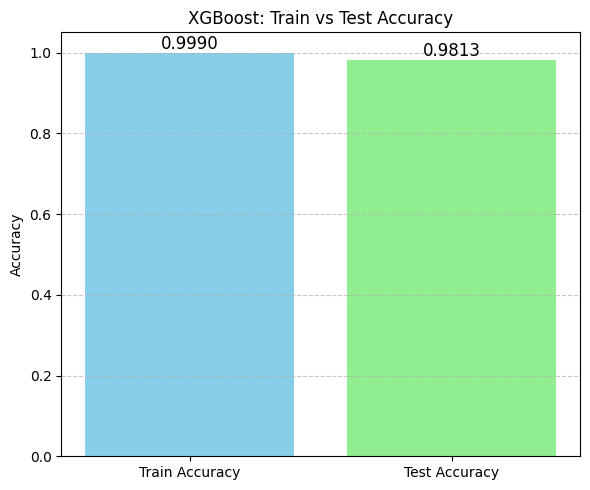

In [14]:
import matplotlib.pyplot as plt

# Calculate accuracy
train_acc = accuracy_score(y_train_new, xgb_model.predict(X_train_new))
val_acc = accuracy_score(y_val, xgb_model.predict(X_val))

# Data for plot
labels = ['Train Accuracy', 'Test Accuracy']
scores = [train_acc, val_acc]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, scores, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.title('XGBoost: Train vs Test Accuracy')

# Annotate with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}",
             ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


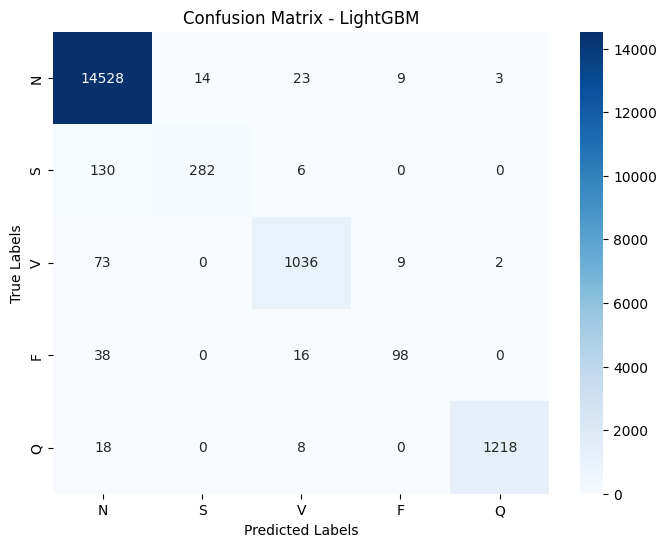

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# XGBoost Confusion Matrix
conf_matrix = np.array([[14528  ,  14 ,   23  ,   9  ,   3],
 [  130 ,  282  ,   6 ,    0 ,    0],
 [   73   ,  0  ,1036,     9    , 2],
 [   38   ,  0 ,   16 ,   98  ,   0],
 [   18   ,  0   ,  8   ,  0 , 1218]]
)

# Class labels
labels = ['N', 'S', 'V', 'F', 'Q']  # or replace with your actual class names

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LightGBM')
plt.show()



In [16]:
from sklearn.metrics import classification_report

# Get predictions for XGBoost
lgbm_y_pred_val = results['LightGBM']['Confusion Matrix'].argmax(axis=1)  # <-- Optional if you only have CM
lgbm_y_pred = lgbm_model.predict(X_val)

# Print the classification report
print("Class-wise Evaluation Metrics for LightGBM:\n")
print(classification_report(y_val, lgbm_y_pred, digits=4))


Class-wise Evaluation Metrics for LightGBM:

              precision    recall  f1-score   support

         0.0     0.9825    0.9966    0.9895     14577
         1.0     0.9527    0.6746    0.7899       418
         2.0     0.9513    0.9250    0.9380      1120
         3.0     0.8448    0.6447    0.7313       152
         4.0     0.9959    0.9791    0.9874      1244

    accuracy                         0.9801     17511
   macro avg     0.9455    0.8440    0.8872     17511
weighted avg     0.9795    0.9801    0.9791     17511



In [17]:
from sklearn.metrics import classification_report

# Train performance
y_train_pred = lgbm_model.predict(X_train_new)

train_accuracy = accuracy_score(y_train_new, y_train_pred)
train_precision = precision_score(y_train_new, y_train_pred, average='macro')
train_recall = recall_score(y_train_new, y_train_pred, average='macro')
train_f1 = f1_score(y_train_new, y_train_pred, average='macro')

print("LightGBM Performance on Training Set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-score: {train_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_train_new, y_train_pred))


LightGBM Performance on Training Set:
Accuracy: 0.9981
Precision: 0.9990
Recall: 0.9884
F1-score: 0.9936

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57893
         1.0       1.00      0.95      0.97      1805
         2.0       1.00      0.99      1.00      4668
         3.0       1.00      1.00      1.00       489
         4.0       1.00      1.00      1.00      5187

    accuracy                           1.00     70042
   macro avg       1.00      0.99      0.99     70042
weighted avg       1.00      1.00      1.00     70042



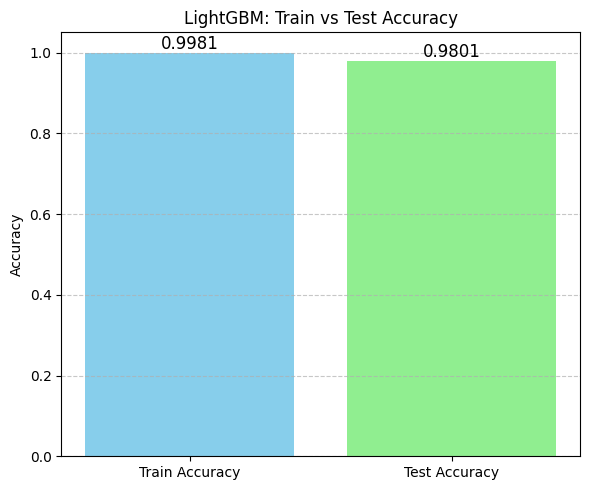

In [18]:
import matplotlib.pyplot as plt

# Calculate accuracy
train_acc = accuracy_score(y_train_new, lgbm_model.predict(X_train_new))
val_acc = accuracy_score(y_val, lgbm_model.predict(X_val))

# Data for plot
labels = ['Train Accuracy', 'Test Accuracy']
scores = [train_acc, val_acc]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, scores, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.title('LightGBM: Train vs Test Accuracy')

# Annotate with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}",
             ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **SIMPLE**

In [20]:
import pandas as pd

df_test = pd.read_csv('/content/drive/MyDrive/rt/mitbih_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/rt/mitbih_train.csv')

In [21]:
# Shape and Data Types
print("df_test shape:", df_test.shape)
print("df_train shape:", df_train.shape)
print("\ndf_test data types:\n", df_test.dtypes)
print("\ndf_train data types:\n", df_train.dtypes)

# Descriptive Statistics
print("\ndf_test descriptive statistics:\n", df_test.describe())
print("\ndf_train descriptive statistics:\n", df_train.describe())

# Target Variable Identification
# Assuming the last column is the target variable
target_column_test = df_test.columns[-1]
target_column_train = df_train.columns[-1]

print("\ndf_test target variable:", target_column_test)
print("df_train target variable:", target_column_train)

print("\ndf_test target variable unique values and distribution:\n", df_test[target_column_test].value_counts())
print("\ndf_train target variable unique values and distribution:\n", df_train[target_column_train].value_counts())

df_test shape: (21891, 188)
df_train shape: (87553, 188)

df_test data types:
 1.00       float64
0.76       float64
0.11       float64
0.00       float64
0.08       float64
            ...   
0.00.61    float64
0.00.62    float64
0.00.63    float64
0.00.64    float64
0.00.65    float64
Length: 188, dtype: object

df_train data types:
 0.98       float64
0.93       float64
0.68       float64
0.25       float64
0.15       float64
            ...   
0.00.84    float64
0.00.85    float64
0.00.86    float64
0.00.87    float64
0.00.88    float64
Length: 188, dtype: object

df_test descriptive statistics:
                1.00          0.76          0.11          0.00          0.08  \
count  21891.000000  21891.000000  21891.000000  21891.000000  21891.000000   
mean       0.894399      0.761898      0.426635      0.221581      0.201699   
std        0.234589      0.218661      0.228579      0.208734      0.177768   
min        0.000000      0.000000      0.000000      0.000000      0.000000 

In [22]:
# Check for missing values
print("Missing values in df_test:\n", df_test.isnull().sum())
print("\nMissing values in df_train:\n", df_train.isnull().sum())

# Handle missing values (if any) - For example, replace with mean:
# df_test.fillna(df_test.mean(), inplace=True)
# df_train.fillna(df_train.mean(), inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows in df_test:", df_test.duplicated().sum())
print("Number of duplicate rows in df_train:", df_train.duplicated().sum())

# Remove duplicates (if any)
df_test.drop_duplicates(inplace=True)
df_train.drop_duplicates(inplace=True)

Missing values in df_test:
 1.00       0
0.76       0
0.11       0
0.00       0
0.08       0
          ..
0.00.61    0
0.00.62    0
0.00.63    0
0.00.64    0
0.00.65    0
Length: 188, dtype: int64

Missing values in df_train:
 0.98       0
0.93       0
0.68       0
0.25       0
0.15       0
          ..
0.00.84    0
0.00.85    0
0.00.86    0
0.00.87    0
0.00.88    0
Length: 188, dtype: int64

Number of duplicate rows in df_test: 0
Number of duplicate rows in df_train: 0


In [23]:
from sklearn.model_selection import train_test_split

X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

Logistic Regression trained successfully.
K-Nearest Neighbors trained successfully.
Naive Bayes trained successfully.
Decision Tree trained successfully.


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model_name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')  # Adjust 'average' if needed
    recall = recall_score(y_val, y_pred, average='weighted')  # Adjust 'average' if needed
    f1 = f1_score(y_val, y_pred, average='weighted')  # Adjust 'average' if needed

    print(f"{model_name} Evaluation:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 20)

Logistic Regression Evaluation:
  Accuracy: 0.9162
  Precision: 0.9052
  Recall: 0.9162
  F1-Score: 0.9057
--------------------
K-Nearest Neighbors Evaluation:
  Accuracy: 0.9711
  Precision: 0.9701
  Recall: 0.9711
  F1-Score: 0.9698
--------------------
Naive Bayes Evaluation:
  Accuracy: 0.1693
  Precision: 0.7934
  Recall: 0.1693
  F1-Score: 0.1711
--------------------
Decision Tree Evaluation:
  Accuracy: 0.9545
  Precision: 0.9544
  Recall: 0.9545
  F1-Score: 0.9545
--------------------


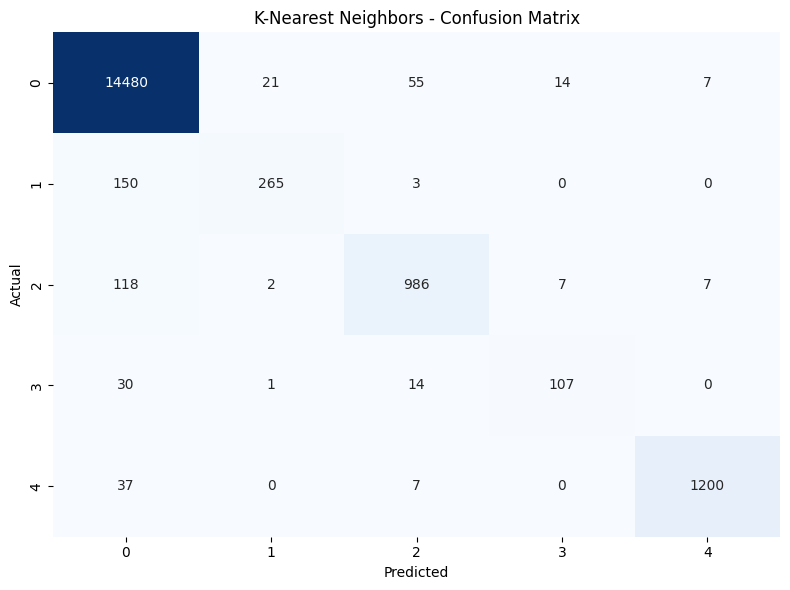


KNN Class-wise Evaluation Report:
              precision  recall  f1-score    support
0.0              0.9774  0.9933    0.9853  14577.000
1.0              0.9170  0.6340    0.7496    418.000
2.0              0.9258  0.8804    0.9025   1120.000
3.0              0.8359  0.7039    0.7643    152.000
4.0              0.9885  0.9646    0.9764   1244.000
accuracy         0.9730  0.9730    0.9730      0.973
macro avg        0.9289  0.8353    0.8756  17511.000
weighted avg     0.9722  0.9730    0.9718  17511.000


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Split your dataset (X = features, y = target)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train your KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 3: Predict on validation set
y_pred_knn = knn.predict(X_val)

# Step 4: Confusion matrix
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 6: Class-wise evaluation
class_report_knn = classification_report(y_val, y_pred_knn, output_dict=True)
class_report_df_knn = pd.DataFrame(class_report_knn).transpose().round(4)

# Display the report
print("\nKNN Class-wise Evaluation Report:")
print(class_report_df_knn)


In [28]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

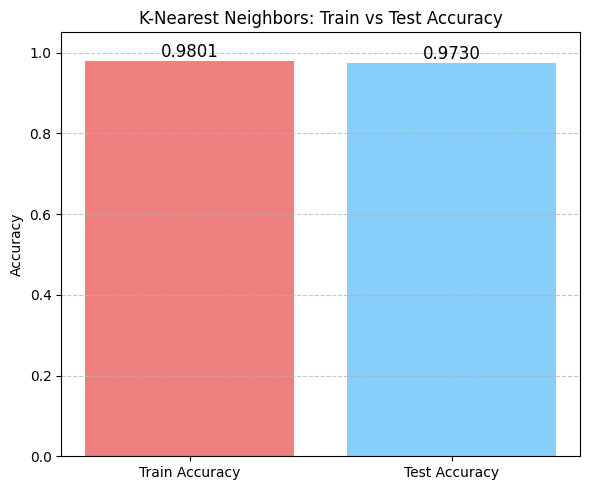

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Predict and calculate accuracy
train_acc_knn = accuracy_score(y_train, knn_model.predict(X_train))
val_acc_knn = accuracy_score(y_val, knn_model.predict(X_val))

# Data for plot
labels = ['Train Accuracy', 'Test Accuracy']
scores = [train_acc_knn, val_acc_knn]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, scores, color=['lightcoral', 'lightskyblue'])
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors: Train vs Test Accuracy')

# Annotate with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}",
             ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [31]:
y_pred_dtree = dtree.predict(X_val)

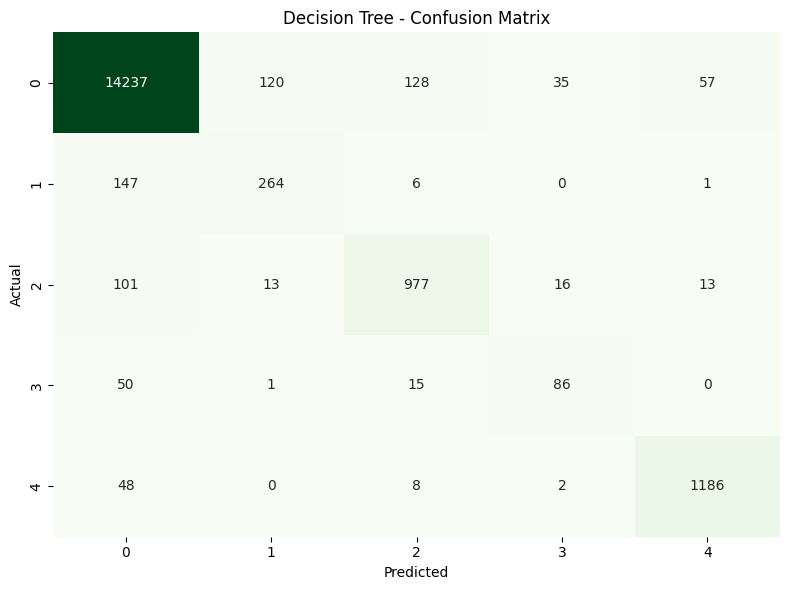

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_dtree = confusion_matrix(y_val, y_pred_dtree)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics import classification_report
import pandas as pd

class_report_dtree = classification_report(y_val, y_pred_dtree, output_dict=True)
class_report_df_dtree = pd.DataFrame(class_report_dtree).transpose().round(4)

print("\nDecision Tree Class-wise Evaluation Report:")
print(class_report_df_dtree)



Decision Tree Class-wise Evaluation Report:
              precision  recall  f1-score     support
0.0              0.9763  0.9767    0.9765  14577.0000
1.0              0.6633  0.6316    0.6471    418.0000
2.0              0.8616  0.8723    0.8669   1120.0000
3.0              0.6187  0.5658    0.5911    152.0000
4.0              0.9435  0.9534    0.9484   1244.0000
accuracy         0.9565  0.9565    0.9565      0.9565
macro avg        0.8127  0.7999    0.8060  17511.0000
weighted avg     0.9560  0.9565    0.9563  17511.0000


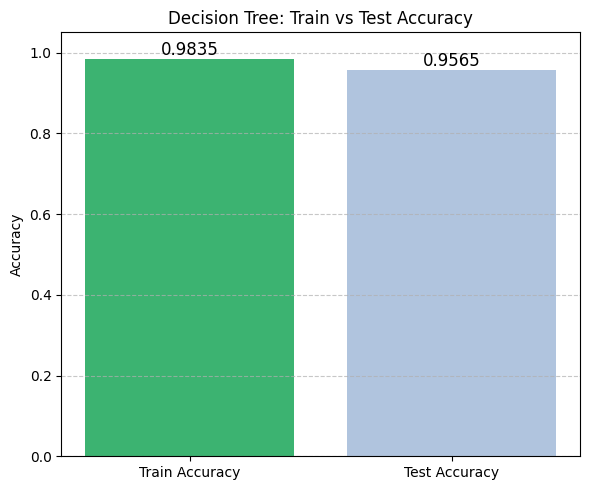

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_acc_dtree = accuracy_score(y_train, dtree.predict(X_train))
val_acc_dtree = accuracy_score(y_val, dtree.predict(X_val))

# Accuracy values
train_acc_dtree = 0.9835
val_acc_dtree = 0.9565

# Labels and scores
labels = ['Train Accuracy', 'Test Accuracy']
scores = [train_acc_dtree, val_acc_dtree]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, scores, color=['mediumseagreen', 'lightsteelblue'])
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.title('Decision Tree: Train vs Test Accuracy')

# Annotate with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}",
             ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
